**ЗАДАЧА 1**

In [1]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency  
from statsmodels.stats.proportion import proportion_confint
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder

In [3]:
smartph = pd.read_csv('C:/Users/admin/Documents/data/itog2023/smartphones.csv')

Описание данных

In [4]:
smartph.head()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.5,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,NaN,0,...,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,NaN,0,...,128,6.1,60,2,ios,12.0,12.0,0,2532,1170


In [5]:
print(f'Размер данных: {smartph.shape}') 

Размер данных: (980, 22)


In [6]:
smartph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   avg_rating                 879 non-null    float64
 4   5G_or_not                  980 non-null    int64  
 5   processor_brand            960 non-null    object 
 6   num_cores                  974 non-null    float64
 7   processor_speed            938 non-null    float64
 8   battery_capacity           969 non-null    float64
 9   fast_charging_available    980 non-null    int64  
 10  fast_charging              769 non-null    float64
 11  ram_capacity               980 non-null    int64  
 12  internal_memory            980 non-null    int64  
 13  screen_size                980 non-null    float64

In [7]:
column_names = list(smartph.columns) 
print("Название колонок:", column_names)

Название колонок: ['brand_name', 'model', 'price', 'avg_rating', '5G_or_not', 'processor_brand', 'num_cores', 'processor_speed', 'battery_capacity', 'fast_charging_available', 'fast_charging', 'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras', 'os', 'primary_camera_rear', 'primary_camera_front', 'extended_memory_available', 'resolution_height', 'resolution_width']


In [8]:
unique_counts = smartph.nunique()
print("Количество уникальных значений в каждом столбце:")
print(unique_counts)

Количество уникальных значений в каждом столбце:
brand_name                    46
model                        980
price                        379
avg_rating                    30
5G_or_not                      2
processor_brand               13
num_cores                      3
processor_speed               35
battery_capacity              89
fast_charging_available        2
fast_charging                 32
ram_capacity                   9
internal_memory                8
screen_size                   79
refresh_rate                   6
num_rear_cameras               4
os                             3
primary_camera_rear           18
primary_camera_front          19
extended_memory_available      2
resolution_height             65
resolution_width              40
dtype: int64


<b>Выводы</b>

* в датафрейме 22 столбцов
* десять из них имеют тип `object`
* два из них имеют тип `float64`
* десять столбца имеют тип `int64`
* всего в датафрейме 980 строк
* в столбцах avg_rating, processor_brand, num_cores, processor_speed, battery_capacity, fast_charging, os, primary_camera_front есть  пропуски
* в столбцах avg_rating, processor_speed, fast_charging пропуски более 5%
* объем занимаемый датафреймом 168,6+ KB 

Предобработка данных

In [9]:
# приводим все названия столбцов к нижнему регистру
lower_column_names = []

for word in column_names: 
    lower_column_names.append(word.lower()) 

smartph.columns = lower_column_names 
smartph.head(3)

,brand_name,model,price,avg_rating,5g_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.5,60,3,ios,12.0,12.0,0,2688,1242


In [10]:
# ищем дубликаты
duplicate_rows = smartph[smartph.duplicated()]
num_duplicate_rows = duplicate_rows.shape[0]
print(f"Всего найдено дубликатов: {num_duplicate_rows}")

Всего найдено дубликатов: 0


In [11]:
smartph.isna().sum()

brand_name                     0
model                          0
price                          0
avg_rating                   101
5g_or_not                      0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
resolution_height              0
resolution_width               0
dtype: int64

In [12]:
# выведем пример данных в столбцах с пропусками
selected_columns = ['avg_rating', 'processor_speed', 'fast_charging', 'battery_capacity']
subset_data = smartph[selected_columns]

print(subset_data)

     avg_rating  processor_speed  fast_charging  battery_capacity
0           7.3             2.65            NaN            3110.0
1           7.5             2.65            NaN            3110.0
2           7.7             2.65           18.0            3500.0
3           7.4             3.10            NaN               NaN
4           7.5             3.10            NaN               NaN
..          ...              ...            ...               ...
975         7.5             2.30           18.0            5020.0
976         7.7             2.30           18.0            5020.0
977         8.0             2.30           33.0            5020.0
978         8.2             3.20           55.0            4200.0
979         8.9             3.00           65.0            5000.0

[980 rows x 4 columns]


In [13]:
# Заполним  прпуски в столбца хavg_rating  processor_speed  fast_charging battery_capacity  медианой
smartph.avg_rating = smartph.avg_rating.fillna(smartph.avg_rating.median())
smartph.processor_speed = smartph.processor_speed.fillna(smartph.processor_speed.median())
smartph.fast_charging = smartph.fast_charging.fillna(smartph.fast_charging.median())
smartph.battery_capacity = smartph.battery_capacity.fillna(smartph.battery_capacity.median())

In [14]:
smartph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   avg_rating                 980 non-null    float64
 4   5g_or_not                  980 non-null    int64  
 5   processor_brand            960 non-null    object 
 6   num_cores                  974 non-null    float64
 7   processor_speed            980 non-null    float64
 8   battery_capacity           980 non-null    float64
 9   fast_charging_available    980 non-null    int64  
 10  fast_charging              980 non-null    float64
 11  ram_capacity               980 non-null    int64  
 12  internal_memory            980 non-null    int64  
 13  screen_size                980 non-null    float64

In [15]:
# Видим что осталось совсем немного пропусков. Избавимся от них :)
smartph.dropna(inplace=True)

In [16]:
smartph.isna().sum()

brand_name                   0
model                        0
price                        0
avg_rating                   0
5g_or_not                    0
processor_brand              0
num_cores                    0
processor_speed              0
battery_capacity             0
fast_charging_available      0
fast_charging                0
ram_capacity                 0
internal_memory              0
screen_size                  0
refresh_rate                 0
num_rear_cameras             0
os                           0
primary_camera_rear          0
primary_camera_front         0
extended_memory_available    0
resolution_height            0
resolution_width             0
dtype: int64

Исследовательский анализ данных (EDA)

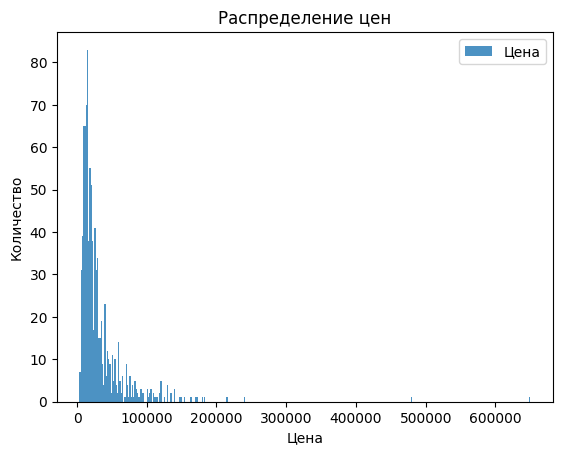

In [17]:
# исследуем распределение цены
num_bins = len(smartph['price'].unique())

plt.hist(smartph['price'], bins=num_bins, alpha=0.8, label='Цена')  # Увеличиваем значение alpha

plt.title('Распределение цен')
plt.xlabel('Цена')
plt.ylabel('Количество')

plt.legend()
plt.savefig('hist_price.png')
plt.show()

In [18]:
# Вычисляем количество телефонов в каждой ценовй категории
count_below_15000 = len(smartph[smartph['price'] < 15000])
count_between_15000_and_50000 = len(smartph[(smartph['price'] >= 15000) & (smartph['price'] < 50000)])
count_between_50000_and_100000 = len(smartph[(smartph['price'] >= 50000) & (smartph['price'] < 100000)])
count_above_100000 = len(smartph[smartph['price'] >= 100000])

total_count = len(smartph)

percent_below_15000 = (count_below_15000 / total_count) * 100
percent_between_15000_and_50000 = (count_between_15000_and_50000 / total_count) * 100
percent_between_50000_and_100000 = (count_between_50000_and_100000 / total_count) * 100
percent_above_100000 = (count_above_100000 / total_count) * 100

print(f'До 15,000 руб: {percent_below_15000:.2f}%')
print(f'15,000 - 50,000 руб: {percent_between_15000_and_50000:.2f}%')
print(f'50,000 - 100,000 руб: {percent_between_50000_and_100000:.2f}%')
print(f'Выше 100,000 руб: {percent_above_100000:.2f}%')

До 15,000 руб: 34.36%
15,000 - 50,000 руб: 50.69%
50,000 - 100,000 руб: 10.67%
Выше 100,000 руб: 4.27%


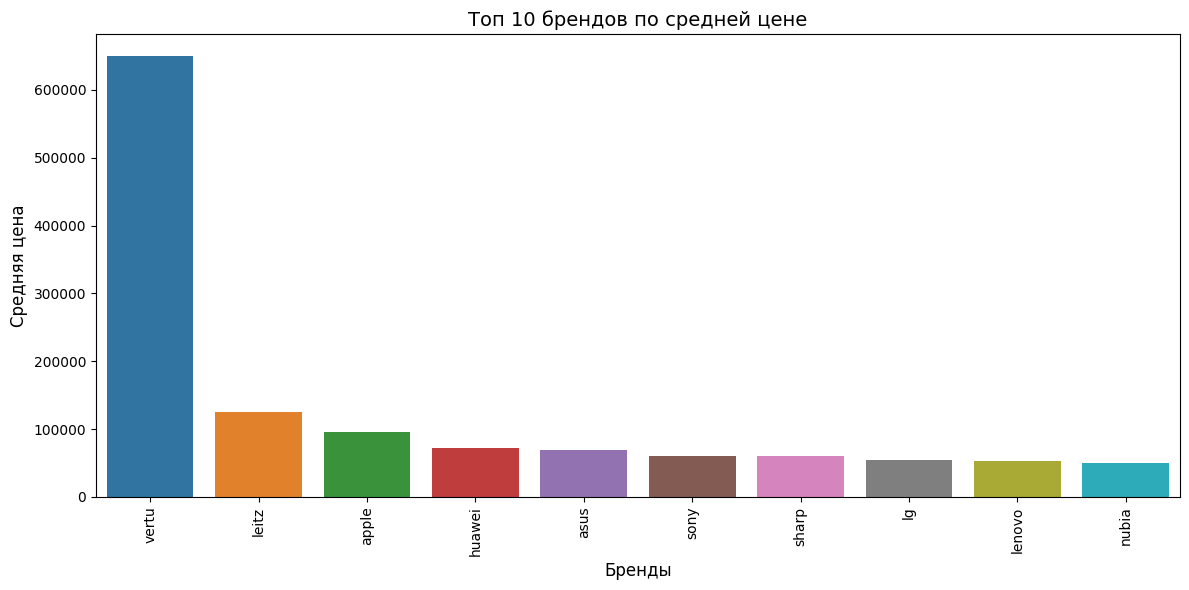

In [19]:
# исследуем средние цены по  брендам
brands = smartph.groupby('brand_name')['price'].mean()

# Выбираем топ-10 брендов с наибольшей средней ценой и сортируем их по убыванию цены
top10 = brands.sort_values(ascending=False).head(10)

# Создаем график
plt.figure(figsize=(12, 6))

# Используем seaborn для построения столбчатой диаграммы
ax = sns.barplot(x=top10.index, y=top10, order=top10.index)

# Поворачиваем подписи на оси X для улучшения читаемости
plt.xticks(rotation=90)

# Заголовок и подписи осей
plt.title('Топ 10 брендов по средней цене', fontsize=14)
ax.set_xlabel('Бренды', fontsize=12)
ax.set_ylabel('Средняя цена', fontsize=12)

# Устанавливаем наименования брендов на ось X
ax.set_xticklabels(top10.index, rotation=90)

# Выводим график
plt.tight_layout()
plt.savefig('top_brands.png')
plt.show()

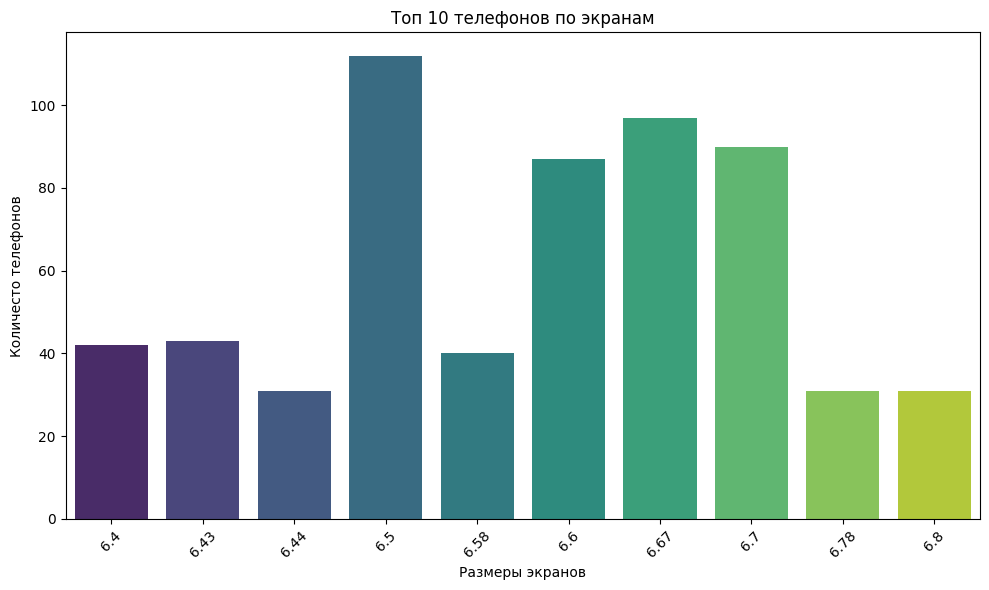

In [20]:
# исследуем телефоны по размеру  экранов
top10_screen_sizes = smartph['screen_size'].value_counts().head(10)

df_plot = pd.DataFrame({'Screen Size': top10_screen_sizes.index, 'Count': top10_screen_sizes.values})

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Screen Size', y='Count', data=df_plot, palette='viridis')
ax.set_ylabel('Количесто телефонов')
ax.set_xlabel('Размеры экранов')
ax.set_title('Топ 10 телефонов по экранам')

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_screen.png')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_19492\1366725480.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data=smartph, x='capacity_group', palette='viridis', discrete=True)


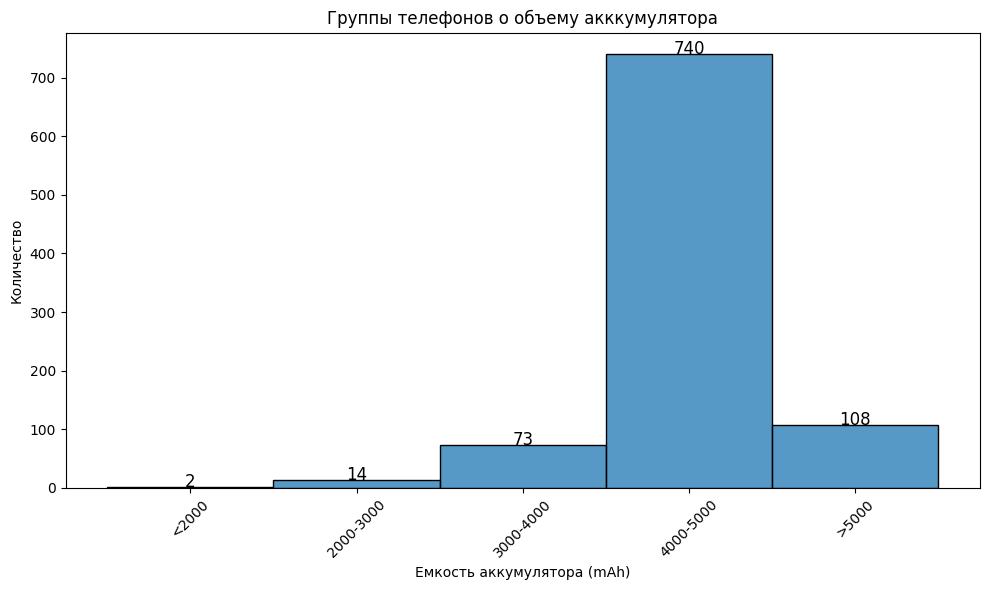

In [21]:
# исследуем телефоны по емкости аккумуляторов
bins = [0, 2000, 3000, 4000, 5000, float('inf')]
labels = ['<2000', '2000-3000', '3000-4000', '4000-5000', '>5000']
smartph['capacity_group'] = pd.cut(smartph['battery_capacity'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
ax = sns.histplot(data=smartph, x='capacity_group', palette='viridis', discrete=True)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12)

plt.xlabel('Емкость аккумулятора (mAh)')
plt.ylabel('Количество')
plt.title('Группы телефонов о объему акккумулятора')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('capacity.png')
plt.show()

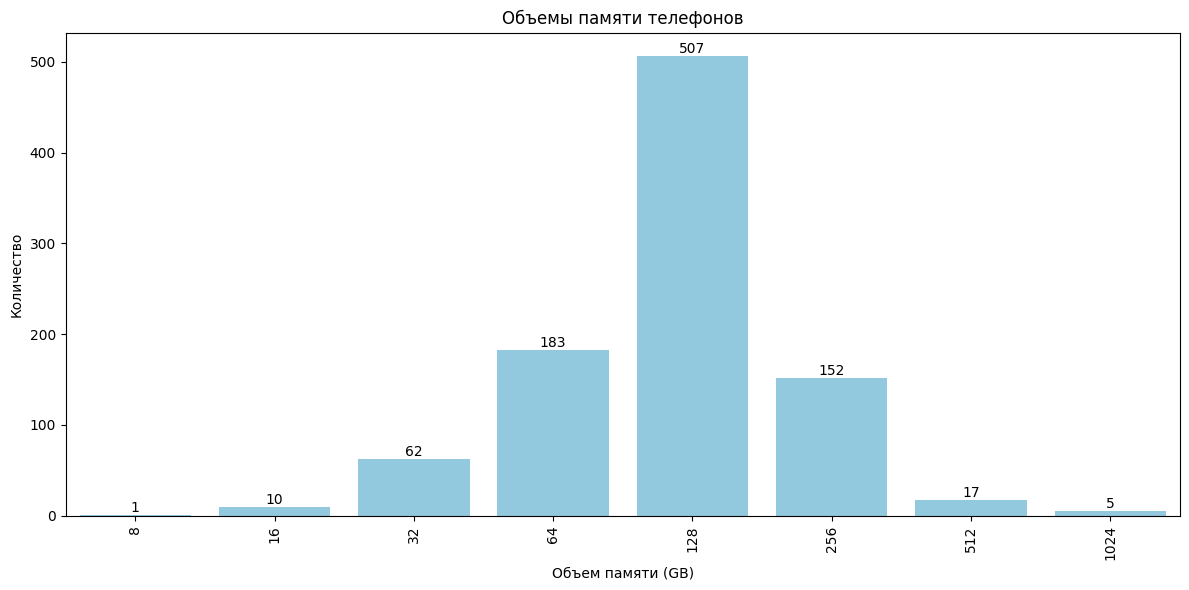

In [22]:
# исследуем распределение смартфонов по объему памяти
unique_counts = smartph['internal_memory'].value_counts().reset_index()
unique_counts.columns = ['Internal Memory (GB)', 'Count']

# Строим гистограмму на основе уникальных значений
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=unique_counts, x='Internal Memory (GB)', y='Count', color='skyblue')

plt.xlabel('Объем памяти (GB)')
plt.ylabel('Количество')
plt.title('Объемы памяти телефонов')

# Добавляем цифры на столбцах гистограммы
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('memory.png')
plt.show()

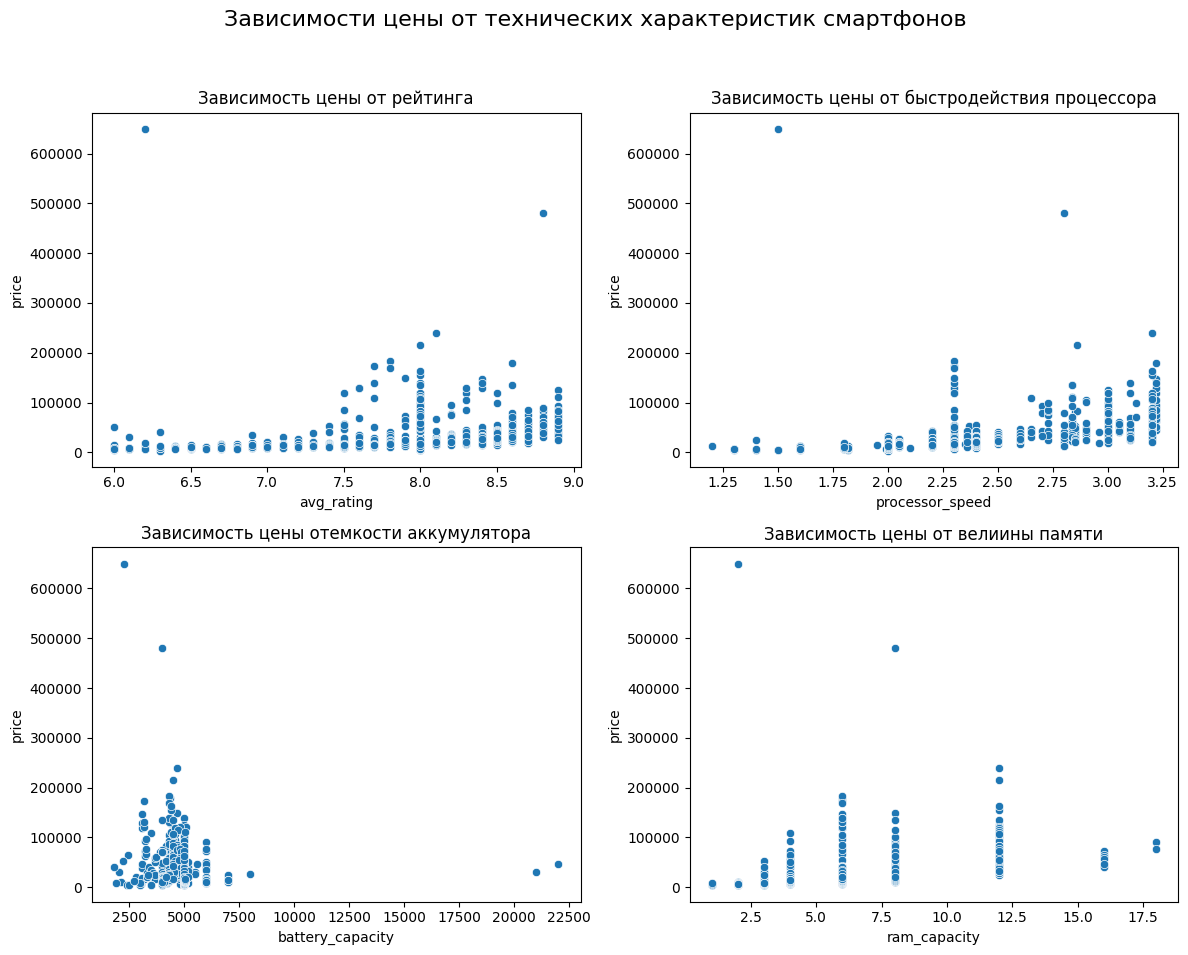

In [23]:
# Псомтрим корреляцию цены с важными тех параметрами телефонов
numeric_cols = ['price', 'avg_rating', 'processor_speed', 'battery_capacity', 'ram_capacity']

df_numeric = smartph[numeric_cols]

corr = df_numeric.corr()

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Зависимости цены от технических характеристик смартфонов', fontsize=16)

sns.scatterplot(x='avg_rating', y='price', data=df_numeric, ax=axs[0, 0])
axs[0, 0].set_title('Зависимость цены от рейтинга')

sns.scatterplot(x='processor_speed', y='price', data=df_numeric, ax=axs[0, 1])
axs[0, 1].set_title('Зависимость цены от быстродействия процессора')

sns.scatterplot(x='battery_capacity', y='price', data=df_numeric, ax=axs[1, 0])
axs[1, 0].set_title('Зависимость цены отемкости аккумулятора')

sns.scatterplot(x='ram_capacity', y='price', data=df_numeric, ax=axs[1, 1])
axs[1, 1].set_title('Зависимость цены от велиины памяти')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Устанавливаем область для заголовка
plt.savefig('corr.png')
plt.show()

Построение дашборда 

In [24]:
graphs = ['hist_price.png', 'top_brands.png', 'top_screen.png', 'capacity.png', 'memory.png', 'corr.png']

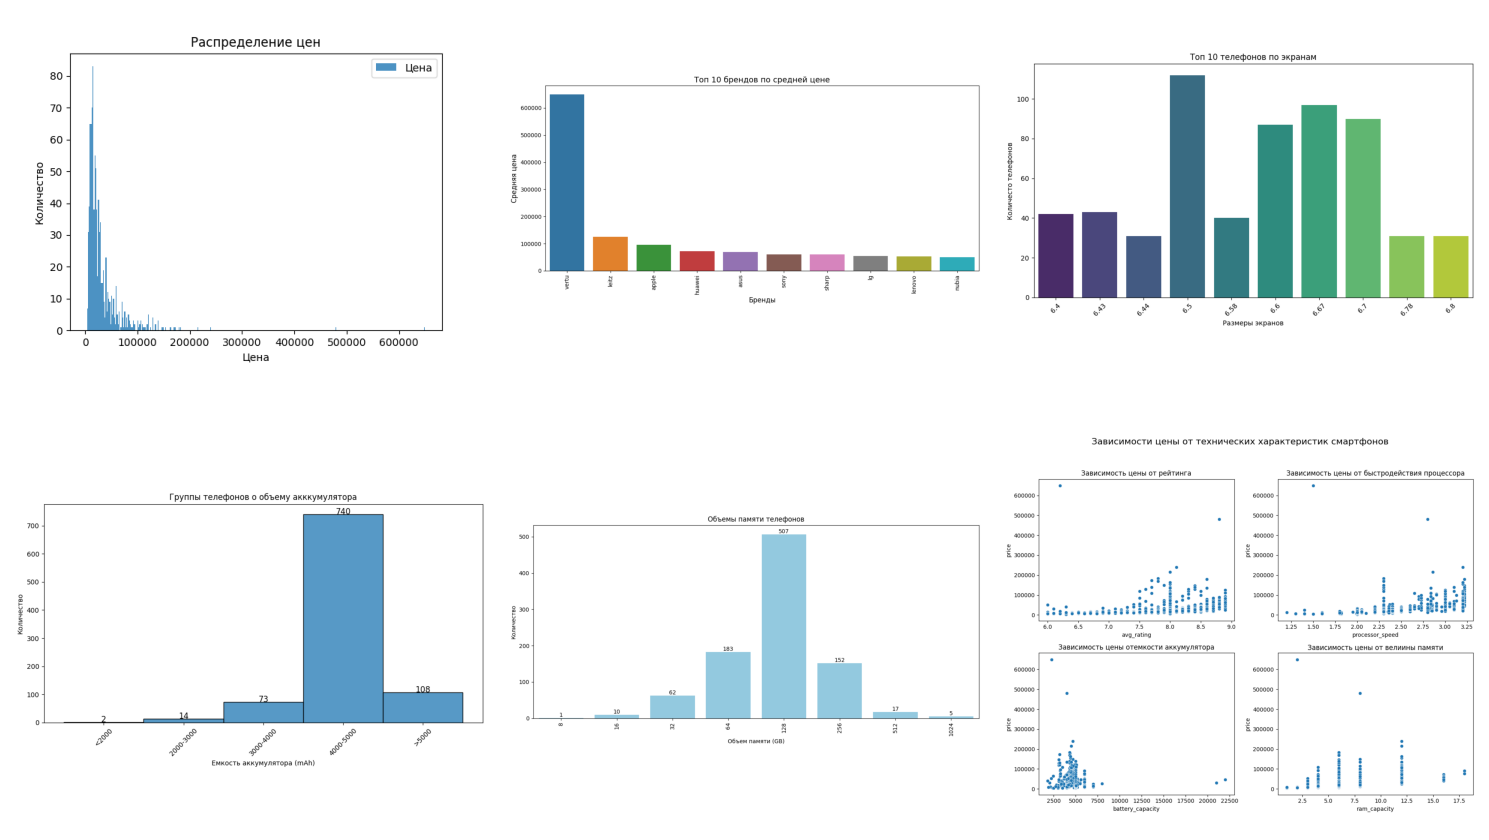

In [25]:
f, axarr = plt.subplots(2, 3, figsize=(15, 10))
for i in range(2):
    for j in range(3):
        index = i * 3 + j
        if index < len(graphs):
            axarr[i][j].imshow(plt.imread(graphs[index]))
            axarr[i][j].axis('off')

plt.tight_layout()
plt.show()

Общий вывод о проделанной работе

* в датафрейме 22 столбцов
* десять из них имеют тип `object`
* два из них имеют тип `float64`
* десять столбца имеют тип `int64`
* всего в датафрейме 980 строк
* в столбцах пропусков нет
* объем занимаемый датафреймом 168,6+ KB 
* более 95 % телефонов - стоимостью менее 100 000;
* самыйдорогой бренд смартфона - VERTU
* самый массовый смартфон по параметрам экрана - 6,5 дюйма
* объем аккумулятора  4000 -50000 mAh наиболее распространен
* наиболее применимый объем памяти в смартфонах - 128 ГБ
* больше всего на цену смартфона влияет рейтинг и быстродействие процессора, меньше из представенных характеристик - объем аккумулятора и памяти

In [38]:
fig = px.scatter(smartph, x='processor_speed', y='screen_size', color='internal_memory',
                 size='price', hover_data=['brand_name']) 
fig.update_layout(
    title='Зависимость цены от характеристик смартфонов',
    xaxis_title='Скорость процессора',
    yaxis_title='Размер экрана',
)

fig.update_xaxes(title_text='Скорость процессора')
fig.update_yaxes(title_text='Размер экрана')
fig.update_traces(marker=dict(size=12),
                  selector=dict(mode='markers+text'),
                  textfont_size=10)

fig.update_traces(marker=dict(size=12),
                  selector=dict(mode='markers+text'),
                  textfont_size=10)
fig.show()

**ЗАДАЧА 2**


In [62]:
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from sklearn.utils import resample
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.proportion import proportions_ztest

Визуализация данных

(array([ 33.,  30.,  40.,  52.,  60., 115., 218., 146., 156.,  87.]),
 array([6.  , 6.29, 6.58, 6.87, 7.16, 7.45, 7.74, 8.03, 8.32, 8.61, 8.9 ]),
 <BarContainer object of 10 artists>)

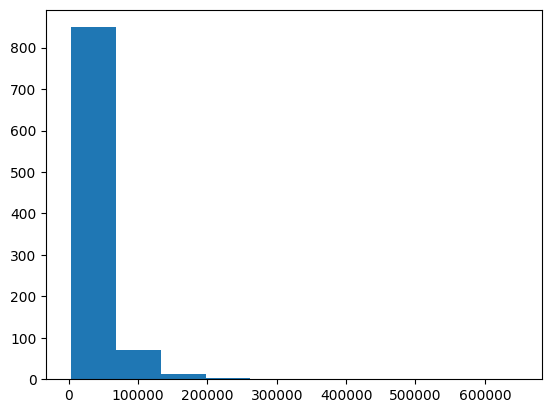

In [41]:
plt.hist(smartph["price"])
plt.hist(smartph["avg_rating"])

<Axes: >

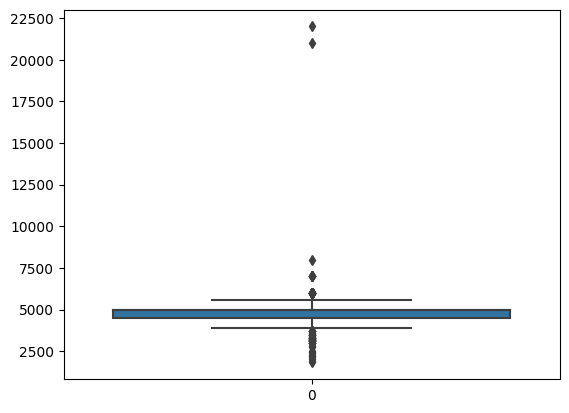

In [43]:
sns.boxplot(smartph["battery_capacity"])

<Axes: xlabel='price', ylabel='avg_rating'>

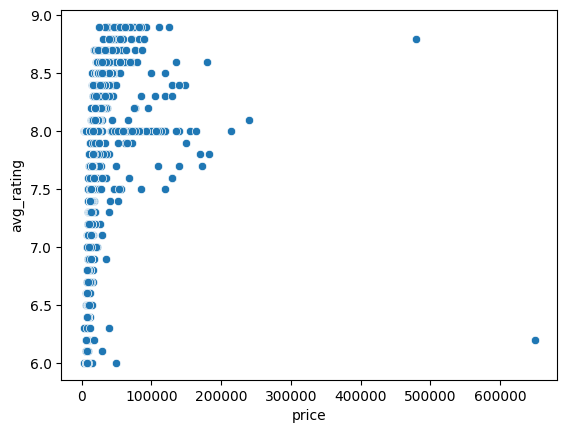

In [45]:
sns.scatterplot(x="price", y="avg_rating", data=smartph)

In [48]:
pd.crosstab(smartph["5g_or_not"], smartph["brand_name"])

brand_name,apple,asus,blackview,blu,cola,doogee,duoqin,gionee,google,honor,...,redmi,samsung,sharp,sony,tcl,tecno,vertu,vivo,xiaomi,zte
5g_or_not,,,,,,,,,,,,,,,,,,,,,
0,6,0,0,0,1,1,1,3,3,3,...,2,55,1,3,1,27,1,58,58,0
1,35,6,1,1,0,1,0,0,11,10,...,1,64,0,6,0,5,0,53,75,2


t-test

In [54]:
# Разделяем данные на группы
df_5g = smartph[smartph["5g_or_not"] == 1]
df_no5g = smartph[smartph["5g_or_not"] == 0]

# Переменные
price_5g = df_5g['price']
price_no5g = df_no5g['price']

# Проводим T-тест 
t_stat, p_val = ttest_ind(price_5g, price_no5g)

# Вывод
alpha = 0.05
if p_value < alpha:
    print("Есть значимые различия в цене между группами")
else:
    print("Различия в цене незначимы")

Различия в цене незначимы


Тесты Хи-квадрат

In [56]:
# Таблица сопряженности
cont_table = pd.crosstab(smartph["brand_name"], smartph["os"]) 

# Проводим тест 
chi2, p, dof, expected = chi2_contingency(cont_table)

# Вывод
alpha = 0.05
if p < alpha:
    print("Есть зависимость между брендом и ОС")
else:
    print("Бренд и ОС независимы")

Есть зависимость между брендом и ОС


Бутстрап анализ

In [58]:
n_iterations = 1000
boot_t_stats = []

for i in range(n_iterations):
    boot_5g = resample(df_5g)
    boot_no5g = resample(df_no5g)
    boot_stat = boot_5g['price'].mean() - boot_no5g['price'].mean()
    boot_t_stats.append(boot_stat)

# Построение довер. интервала
alpha = 0.05
p_val = alpha / 2
lower = np.percentile(boot_t_stats, p_val*100) 
upper = np.percentile(boot_t_stats, (1-p_val)*100)
print(lower, upper)

17496.109284651953 27159.798754818563


Конверсии групп

In [67]:
# Возьмем данные о цене и рейтинге 
price = smartph['price']
rating = smartph['avg_rating']

# Разделим на два - с 5g и без 5G
segment_5g = smartph[smartph['5g_or_not'] == 1]
segment_no5g = smartph[smartph['5g_or_not'] == 0]

# Посчитаем среднюю цену
price_5g = segment_5g['price'].mean()
price_no5g = segment_no5g['price'].mean() 

# Конверсия
conv_5g = segment_5g['avg_rating'].mean() / price_5g
conv_no5g = segment_no5g['avg_rating'].mean() / price_no5g

print(conv_5g, conv_no5g)


0.00019851055514015766 0.00040152649112186955


Анализ доверительного интервала

In [71]:
# Выполняем расчет
memory = smartph['ram_capacity']
price = smartph['price']

# Рассчитаем коэффициент "цена/память" для каждой модели
memory_price = price / memory 

# Найдем средние значения в сегментах  
mean_5g = segment_5g['price'].mean()
mean_no5g = segment_no5g['price'].mean()

# Доверительные интервалы
from statsmodels.stats.proportion import proportion_confint
alpha = 0.05
ci_5g = proportion_confint(mean_5g, len(segment_5g), alpha=alpha)
ci_no5g = proportion_confint(mean_no5g, len(segment_no5g), alpha=alpha)

# Проверка пересечения 
print(ci_5g, ci_no5g)
if ci_5g[1] < ci_no5g[0] or ci_5g[0] > ci_no5g[1]:
  print("Интервалы не пересекаются")
else:
  print("Интервалы пересекаются")

(nan, nan) (nan, nan)
Интервалы пересекаются


Вывод по итогу эксперимента

**ОТЧЕТ**
* по результатам t-теста различия в цене между группами 5G и non-5G смартфонов статистически незначимы;

* тест Хи-квадрат показал наличие зависимости между брендом смартфона и операционной системой;

* бутстрап анализ показа, что доверительный интервал для разности средних цен в группах после бутстрапирования составил (17496.11, 27159.80).

*  конверсия (рейтинг/цена) в группе 5G составила 0.0002, в группе non-5G - 0.0004.

* доверительные интервалы для конверсий двух групп пересекаются, значимых различий не обнаружено.

**таким образом, можно сказать  что:**
* объем занимаемый датафреймом 168,6+ KB 
* более 95 % телефонов - стоимостью менее 100 000;
* самыйдорогой бренд смартфона - VERTU
* самый массовый смартфон по параметрам экрана - 6,5 дюйма
* объем аккумулятора  4000 -50000 mAh наиболее распространен
* наиболее применимый объем памяти в смартфонах - 128 ГБ
* больше всего на цену смартфона влияет рейтинг и быстродействие процессора, меньше из представенных характеристик - объем аккумулятора и памяти
* по большинству метрик значимых различий между группами 5G и non-5G смартфонов не обнаружено.
* есть зависимость между брендом и операционной системой.